In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [8]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [9]:
x=df_encoded.drop('y_yes',axis=1)
y=df_encoded['y_yes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred=model.predict(X_test)


In [14]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)


Accuracy 0.8973791883224593


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      7952
        True       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



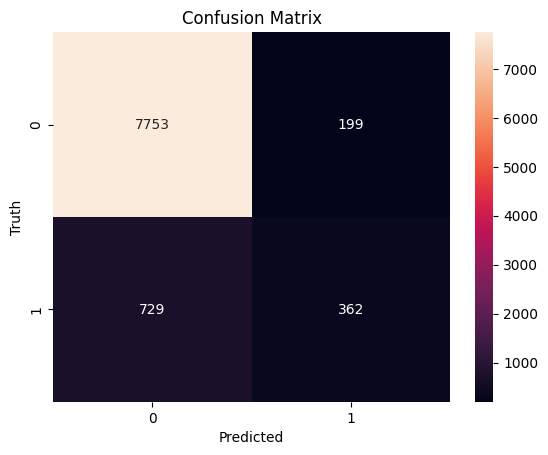

In [16]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

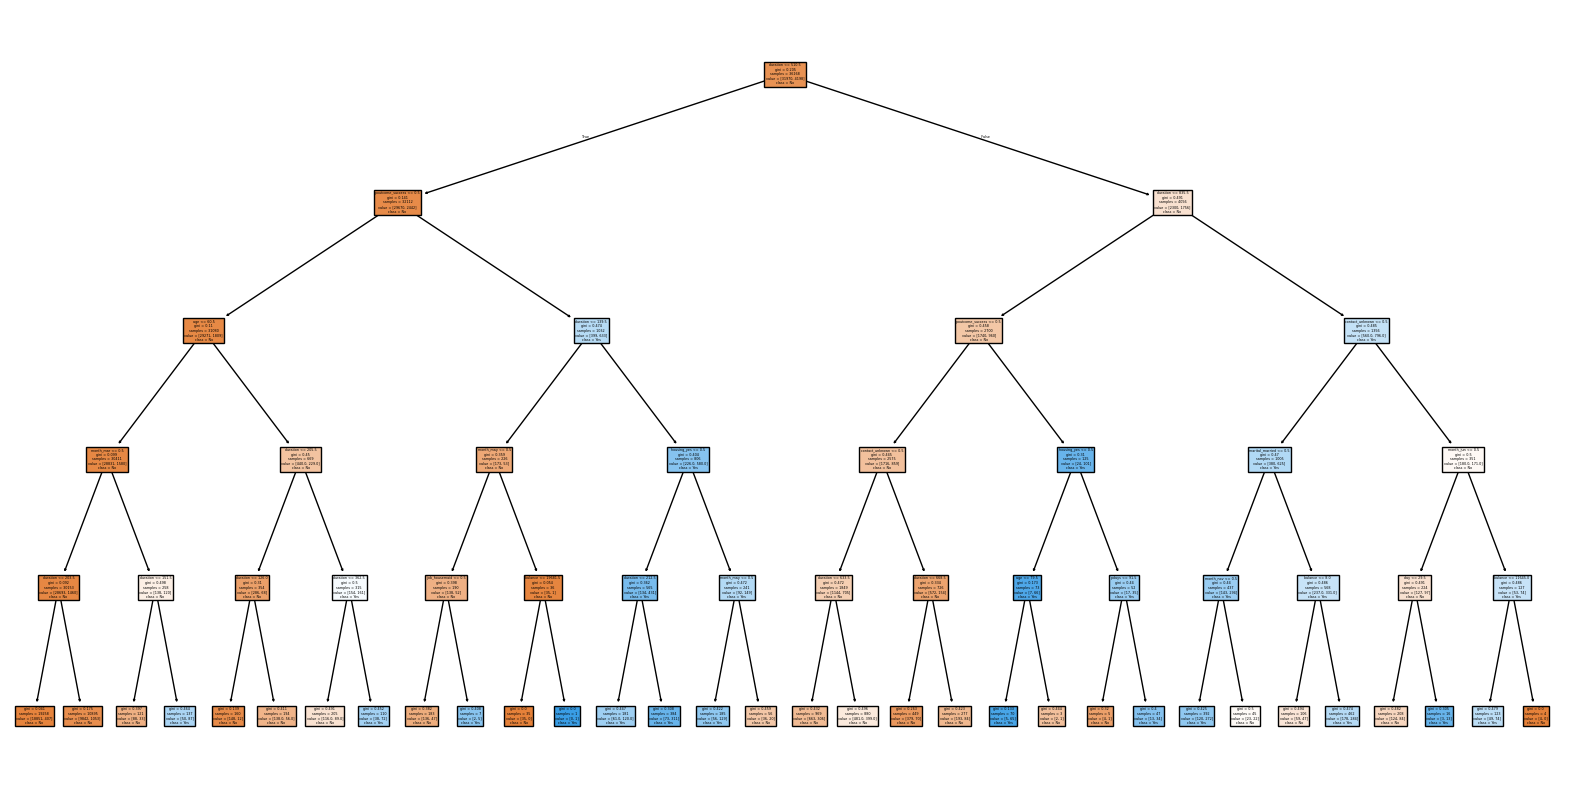

In [17]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=x.columns,class_names=['No','Yes'],filled=True)
plt.show()

Task 03 – Decision Tree Classifier

Built a decision tree model to predict customer purchase behavior.
Performed encoding of categorical variables.
Trained and evaluated the model using accuracy and confusion matrix.